In [1]:
%matplotlib inline

from __future__ import absolute_import

import numpy as np

import ghostpy.Invariants.LShell as ls
import ghostpy.algorithms.convert as algx
import ghostpy.algorithms.common as algc

import ghostpy.data.VtkData as vdt
import cProfile, pstats, StringIO
import ghostpy.data.GpData as gpd
import ghostpy.plotting.FieldLinePlot as flplt
import ghostpy.Invariants.FieldLine as fl
import random as rnd
import csv
from parse import *

import matplotlib.pylab as plt

import glob

In [2]:
outpath = "/Volumes/8TB Seagate/PhD Data/profiles/"
data = vdt.VtkData(filename="unit_tests/test_data/WHIQuad.vts", vector='B')

In [4]:
pt = [0, 3.5, 4.99]
ls1 = ls.LShell(data=data, start_loc=pt, save_lines=True, pre_converge=False)
phi = algc.cart_to_sphere(pt)[2]
oline, iline = ls1.__find_line_from_phi__(phi=phi)




VVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVV
Calculating L*, K for point [0, 3.5, 4.99]


K_LIST: [ 645.45271937  671.59871885  671.60184067]
B_mirror = 234.244091626
K = 671.60184067


Start Phi: 1.57079632679
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
0.798240470448
B Gap Initial: None
B Gap Initial: 69.9579064499
Moving outer boundary out
B Gap Initial: None
B Gap Initial: None


B Gap Initial: -58.0736937721


B Gap Initial: 75.983578264


sB_gap: -1.87883824868


sB_gap: 40.4789856404


sB_gap: 30.5231941252


sB_gap: 24.9005969117


sB_gap: 10.14467083


sB_gap: 6.9208686875


sB_gap: 1.2733504027


sB_gap: 2.38937636727


sB_gap: 1.29555852922


sB_gap: 3.70736414367


sB_gap: 4.18971687791


sB_gap: 0.506474865293


sB_gap: 5.80478731987


sB_gap: 1.89303251227


sB_gap: 3.84017637178


sB_gap: -0.372383947409


sB_gap: 1.70894217519


sB_gap: 3.45092326551


sB_gap: -2.36629871112


sB_gap: 0.211943343914


sB_gap: -0.0816138957836


sB_gap: 3.63245525669


sB_gap: 4.14942518831
Relative B Error (IN): 0.211943343914
Relative B Error (OUT): -0.0816138957836


In [5]:
flines = []
for r in np.arange(start=3, stop=14, step=2.5):
    loc = algc.sphere_to_cart(r=r, lam=0, phi=phi)
    flines.append(ls1.__trace_from_location__(loc))

In [6]:
def remove_duplicates(values):
    output = []
    seen = set()
    for value in values:
        # If value has not been encountered yet,
        # ... add it to both list and set.
        if value not in seen:
            output.append(value)
            seen.add(value)
    return output

We have 1 retained lines.


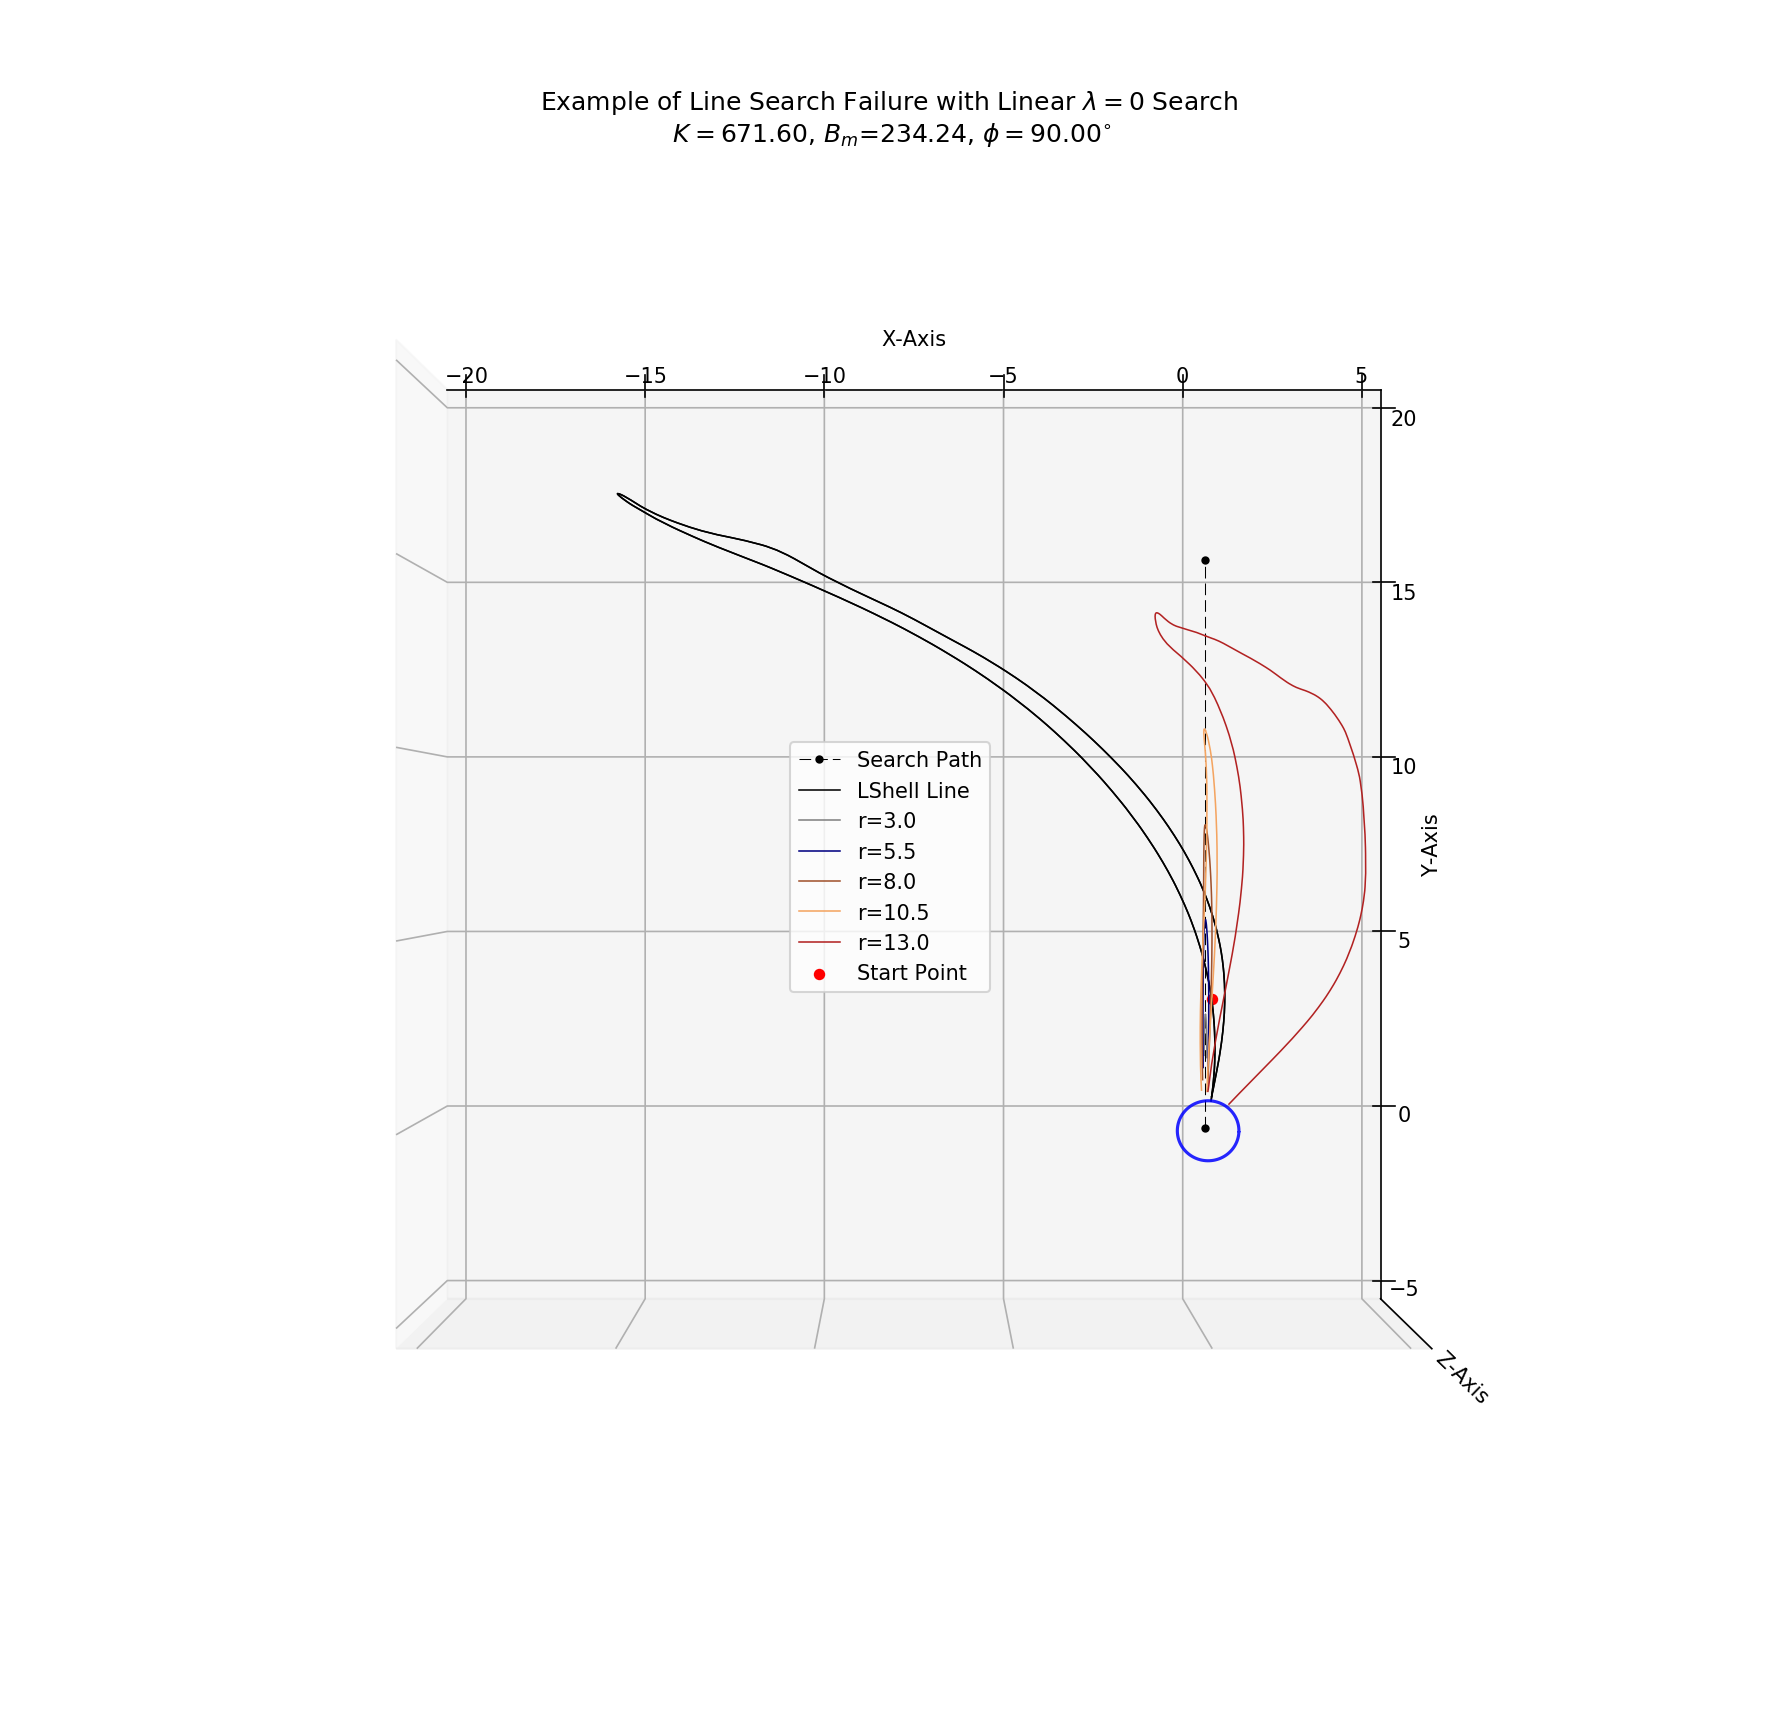

In [15]:
line_plot = flplt.FieldLinePlot()
line_plot.set_axes_lim([[-20,5], [-5,20], [-20,5]])

loc_start = [0,0,0]
loc_end = algc.sphere_to_cart(r=15, lam=0, phi=phi)

line_plot.add_line(loc_start, loc_end, lw=0.5, color='k.--', label="Search Path")

line_plot.add_title("Example of Line Search Failure with Linear $\lambda=0$ Search \n $K=${:.2f}, $B_m$={:.2f}, $\phi={:.2f}^{{\circ}}$ ".format(ls1.k, ls1.b, algx.rad_to_deg(phi)))
line_plot.plot_shell_field_lines(ls1)

colors = ['gray', 'navy', 'sienna', 'sandybrown', 'firebrick']
labels = ["r={}".format(r) for r in np.arange(start=3, stop=14, step=2.5)]
count = 0
for line in flines:
    line_plot.addFieldLine(line, color=colors[count], label=labels[count])
    count += 1

line_plot.changeCameraAngle(theta=90, phi=270)

line_plot.ax.set_zticks([])

line_plot.plot_drift_boundary(ls1)

line_plot.legend(loc='center')


line_plot.show()
line_plot.savePDF(outpath+"SearchError.pdf")

We have 1 retained lines.


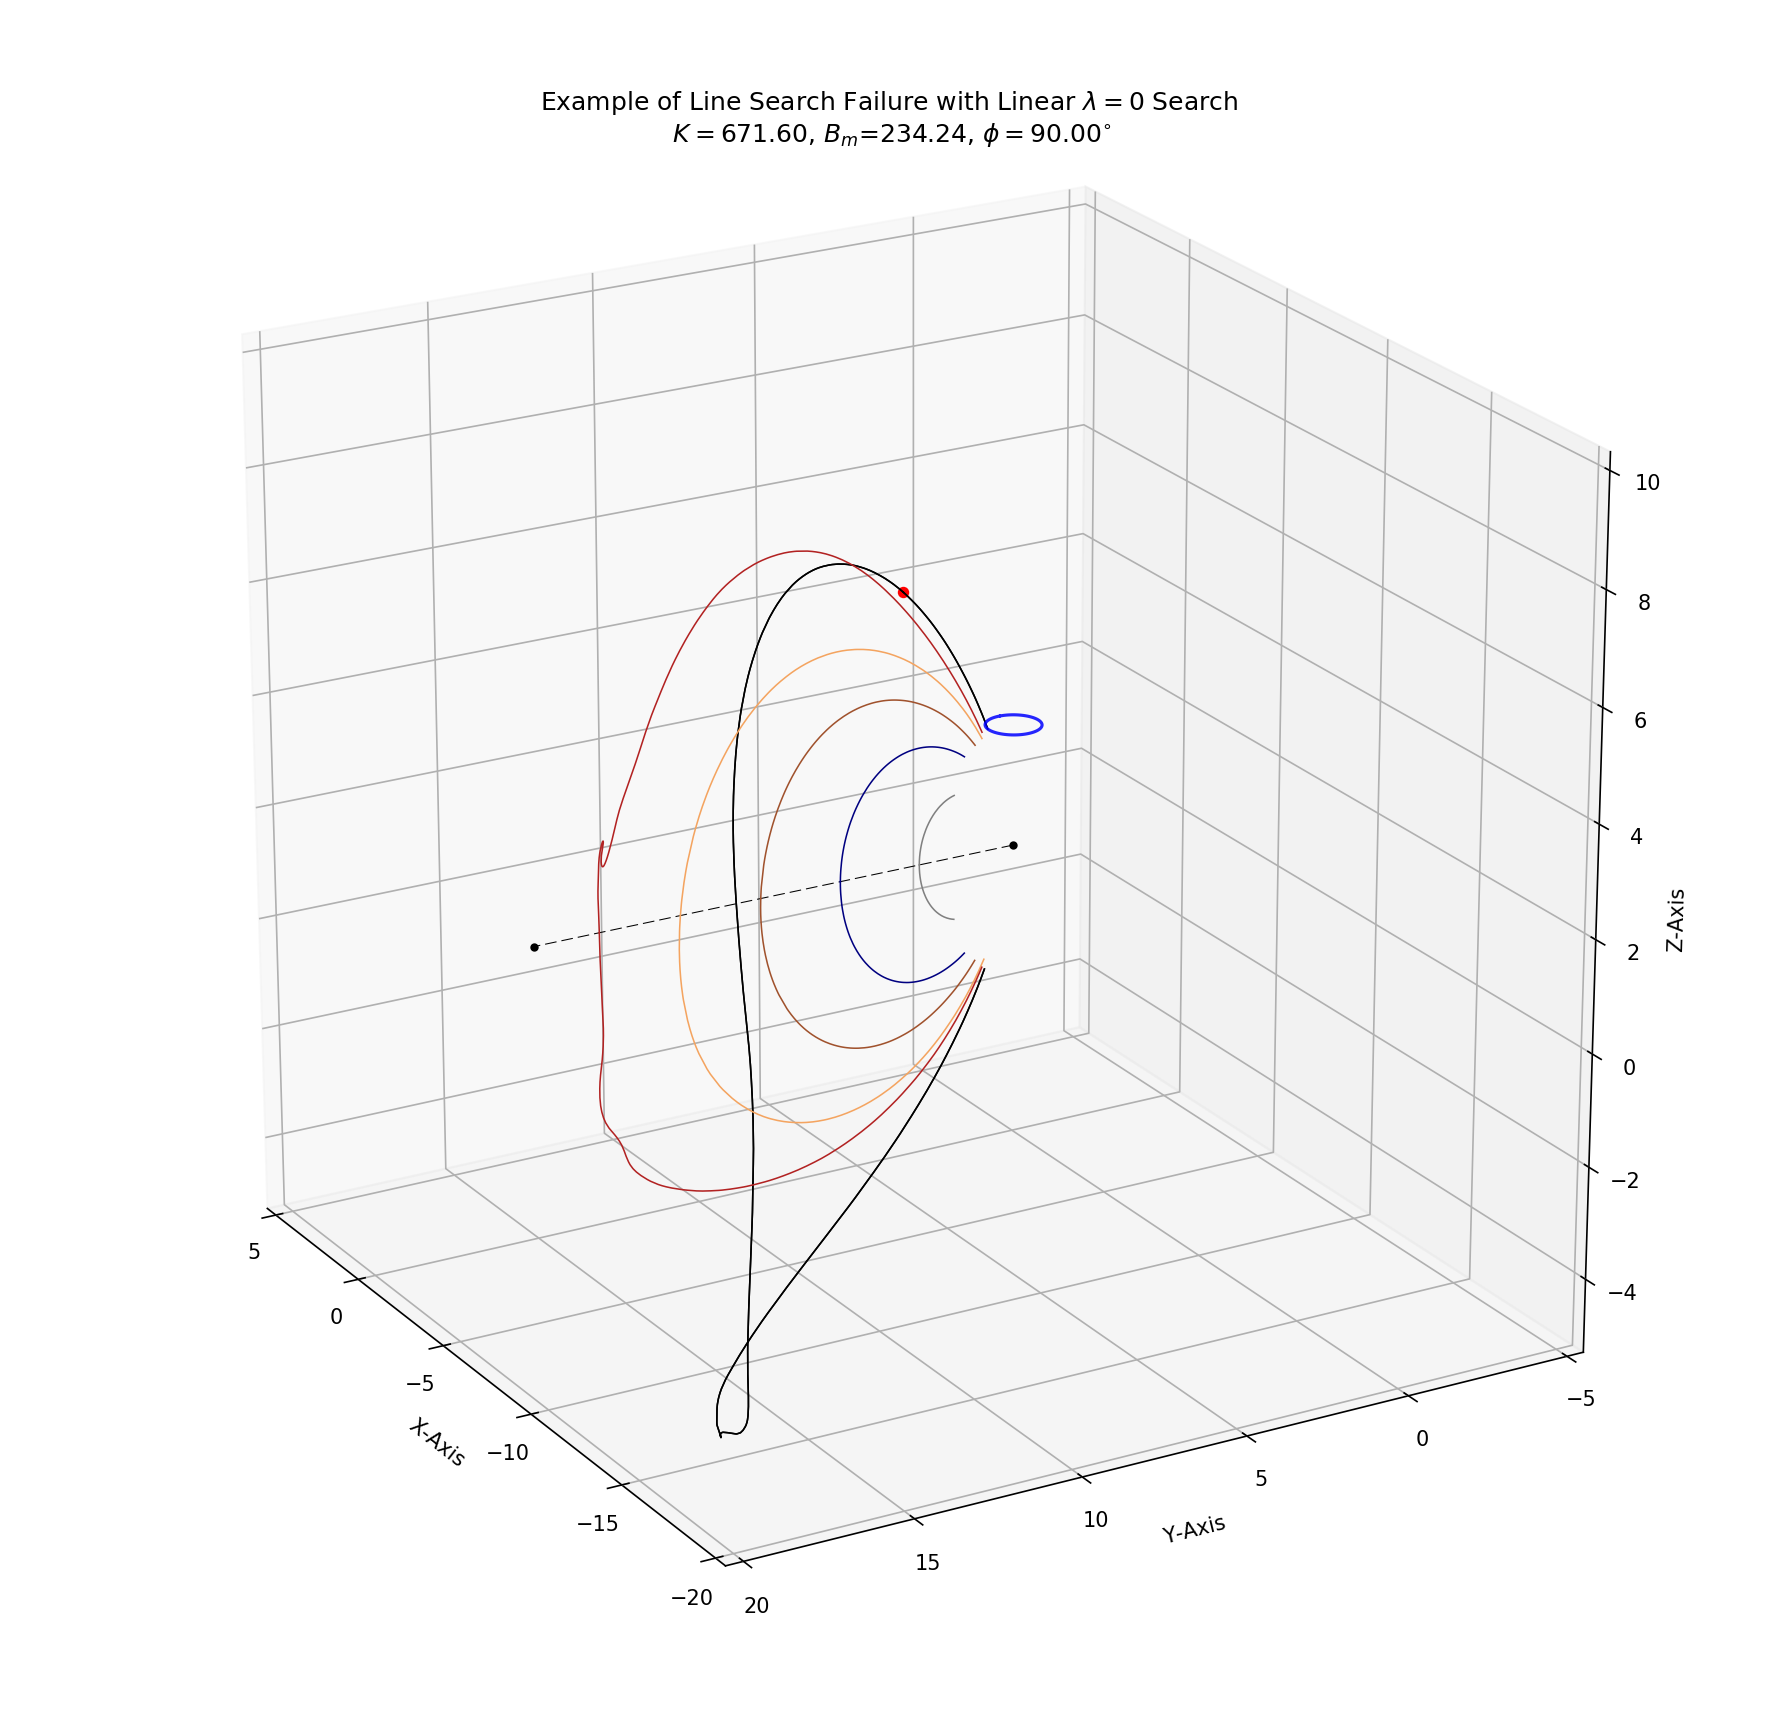

In [16]:
line_plot = flplt.FieldLinePlot()
line_plot.set_axes_lim([[-20,5], [-5,20], [-5,10]])

loc_start = [0,0,0]
loc_end = algc.sphere_to_cart(r=15, lam=0, phi=phi)

line_plot.add_line(loc_start, loc_end, lw=0.5, color='k.--', label="Search Path")

line_plot.add_title("Example of Line Search Failure with Linear $\lambda=0$ Search \n $K=${:.2f}, $B_m$={:.2f}, $\phi={:.2f}^{{\circ}}$ ".format(ls1.k, ls1.b, algx.rad_to_deg(phi)))
line_plot.plot_shell_field_lines(ls1)

colors = ['gray', 'navy', 'sienna', 'sandybrown', 'firebrick']
labels = ["r={}".format(r) for r in np.arange(start=3, stop=14, step=2.5)]
count = 0
for line in flines:
    line_plot.addFieldLine(line, color=colors[count], label=labels[count])
    count += 1

line_plot.changeCameraAngle(theta=22, phi=150)

line_plot.plot_drift_boundary(ls1)

line_plot.show()
line_plot.savePDF(outpath+"SearchError2.pdf")